In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('modified_synthetic_economic_data.csv')

In [3]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [4]:
## drop unnecessary columns 
df.drop(columns=['year','month'],axis=1,inplace=True)


In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [6]:
## Check null values

df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

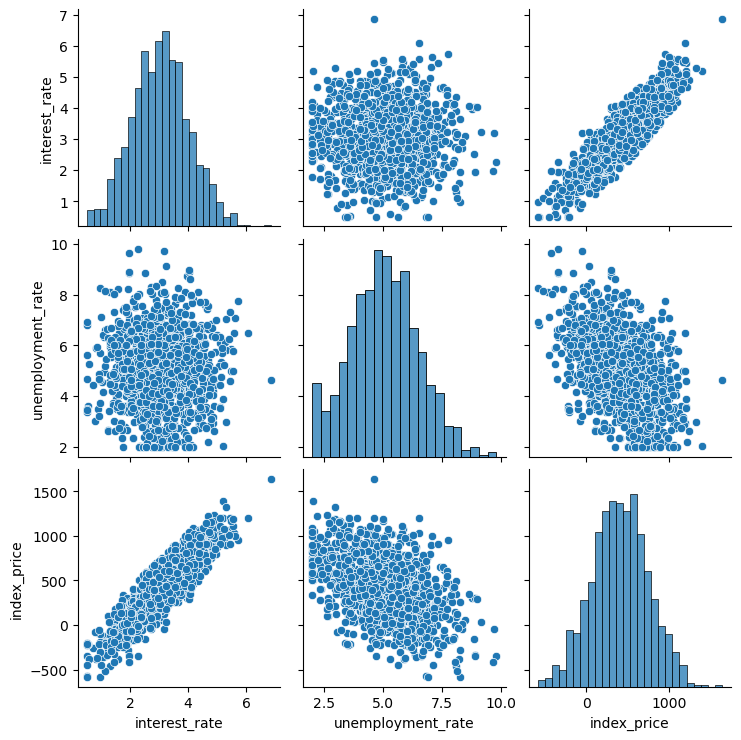

In [7]:
## Lets do some visualization
plot = sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


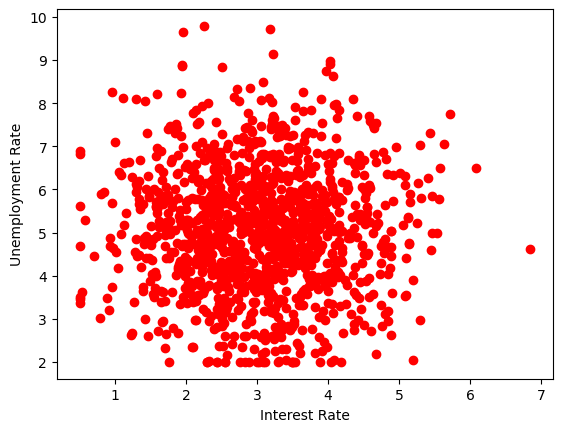

In [9]:
## Visualize the data points more clearly

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [10]:
## Independent and Dependent features 
## x = df[['index_price'],['unemployment_rate']] this is one way

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
## train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

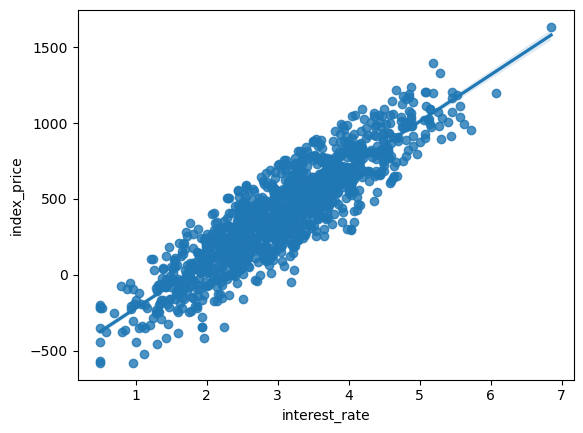

In [12]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])
plt.show()

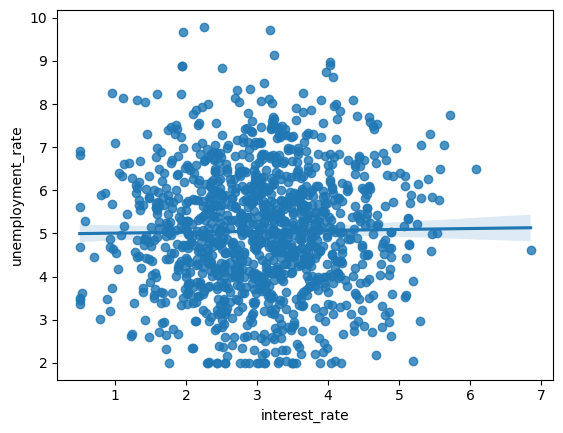

In [13]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])
plt.show()

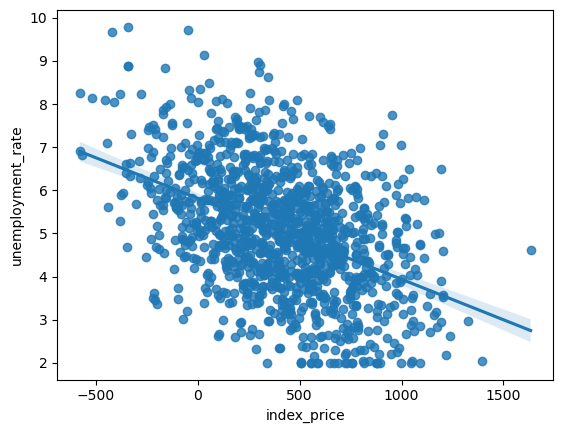

In [14]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [17]:
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [19]:
validation_score

array([-0.59033573, -0.70059044, -0.74756709])

In [20]:
## Prediction 
y_pred = regression.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

0.2843255620646587
0.21605725330786707
0.5332218694546002


In [22]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.9999975863799279


## ASSUMPTIONS

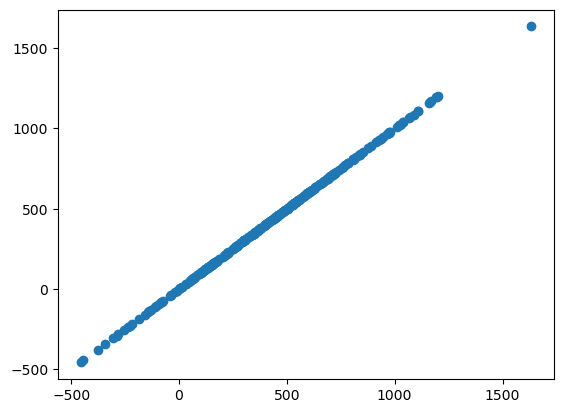

In [23]:
plt.scatter(y_test,y_pred)
plt.show()

In [24]:
residuals = y_test-y_pred
print(residuals)

1178   -0.118447
865    -0.132989
101     0.137677
439    -0.236535
58     -0.232487
          ...   
772     0.032994
494    -0.060790
1027   -0.196982
806    -0.075260
1141   -0.085191
Name: index_price, Length: 300, dtype: float64


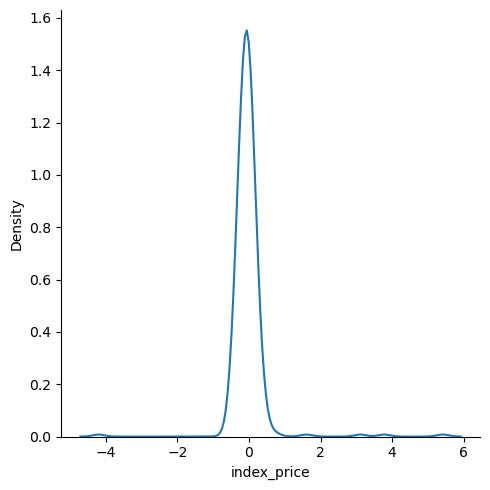

In [25]:
## Plot this Residual
sns.displot(residuals,kind='kde')
plt.show()

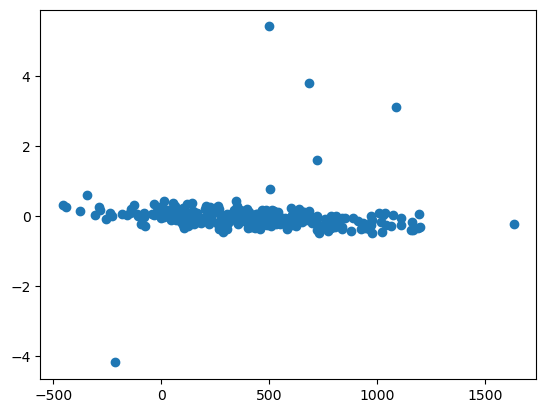

In [26]:
## Scatter Plot with respect to prediction and residuals

plt.scatter(y_pred,residuals)
plt.show()

In [27]:
## OLS Multiple Linear Regression
import statsmodels.api as sm    

In [28]:
model = sm.OLS(y_train,X_train).fit()

In [29]:
prediction = model.predict(X_test)

In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.412
Method:                 Least Squares   F-statistic:                              315.8
Date:                Mon, 28 Apr 2025   Prob (F-statistic):                   1.43e-104
Time:                        16:05:26   Log-Likelihood:                         -6677.3
No. Observations:                 900   AIC:                                  1.336e+04
Df Residuals:                     898   BIC:                                  1.337e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [31]:
print(regression.coef_)

[ 297.94623606 -154.59112154]
